In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import timeit
import sys
from numpy import linalg as LA

np.set_printoptions(threshold=sys.maxsize)

In [140]:
def boundary(f, n):
    
    # Boundary conditions

    # Top
    f[0, :(n // 4)] = np.arange(13, 5, -(13 - 5) / (n // 4))
    f[1, :(n // 4)] = np.arange(13, 5, -(13 - 5) / (n // 4))

    f[:2, (n // 4):(3 * n // 4)] = 5

    f[0, (3 * n // 4):] = np.arange(5, 13, (13 - 5) / (n // 4))
    f[1, (3 * n // 4):] = np.arange(5, 13, (13 - 5) / (n // 4))

    # Bottom
    f[n-2:, :] = 21

    # Left
    f[:(3 * n // 8), 0] = np.arange(13, 40, ((40 - 13) / (3 * n // 8)))
    f[:(3 * n // 8), 1] = np.arange(13, 40, ((40 - 13) / (3 * n // 8)))

    f[(n // 2):, 0] = np.arange(40, 21, -((40 - 21) / (n // 2)))
    f[(n // 2):, 1] = np.arange(40, 21, -((40 - 21) / (n // 2)))

    # Right

    f[:(n // 2), -1] = np.arange(13, 40, ((40 - 13) / (n // 2)))
    f[:(n // 2), -2] = np.arange(13, 40, ((40 - 13) / (n // 2)))

    f[(5 * n // 8):, -1] = np.arange(40, 21, -((40 - 21) / (3 * n // 8)))
    f[(5 * n // 8):, -2] = np.arange(40, 21, -((40 - 21) / (3 * n // 8)))

    # Heater
    f[(3 * n // 8):(n // 2) + 1, :(n // 8 + 1)] = 40

    f[(n // 2):(5 * n // 8) + 1, -(n // 8 + 1):] = 40

In [141]:
def Grid_with_BC(n):

    #grid
    f = np.zeros((n, n))

    boundary(f, n)

    return f

In [142]:
# Initialization
def initgrid(n):
    
    #grid
    f = np.random.randn(n, n)

    boundary(f, n)

    return f

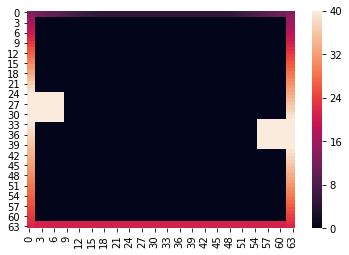

In [143]:
A = Grid_with_BC(64)

# Visualizing the problem
sn.heatmap(A)
plt.show()

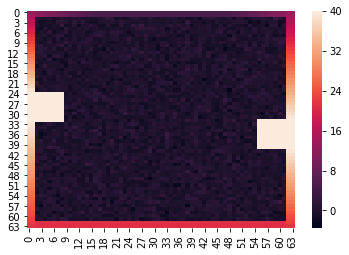

In [146]:
# Initialization
u_0 = initgrid(64)

# Visualizing the problem
sn.heatmap(u)
plt.show()

In [147]:
# Laplace to build RHS (b in A*x = b)

def laplacian(u):
    nx = u.shape[0]
    ny = u.shape[1]
    b = np.zeros([nx,ny])
    
    dx=1.0
    dy=1.0
  
    Ax=1.0/dx**2
    Ay=1.0/dy**2
    
    for i in range(2, nx-1):
      for j in range(2, ny-1):
        b[i, j]=(Ax*(u[i+1,j]+u[i-1,j])+Ay*(u[i,j+1]+u[i,j-1]) - 2.0*(Ax+Ay)*u[i,j])
        
    return b

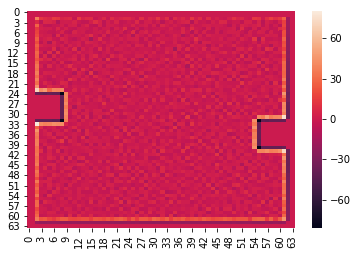

In [148]:
# Laplacian for initial solution

b = laplacian(u_0)

# Visualizing the problem
sn.heatmap(b)
plt.show()

In [149]:
def jacobi(u, b):
    
    nx = u.shape[0]
    ny = u.shape[1]
    _u = np.zeros([nx, ny])
    
    dx=1.0; 
    dy=1.0
  
    Ax=1.0/dx**2;
    Ay=1.0/dy**2
    
    for i in range(2, nx-1):
        for j in range(2, ny-1):

            _u[i, j] = (b[i, j] - (Ax*(u[i+1,j]+u[i-1,j])+Ay*(u[i,j+1]+u[i,j-1]))) / (-2 * (Ax+Ay))
                        
    boundary(_u, nx)
    
    return _u

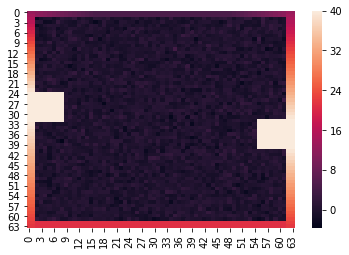

In [150]:
# We get the solution back from jacobi iteration from u_0 and b

u_ = jacobi(u_0, b)

# Visualizing the problem
sn.heatmap(u_)
plt.show()

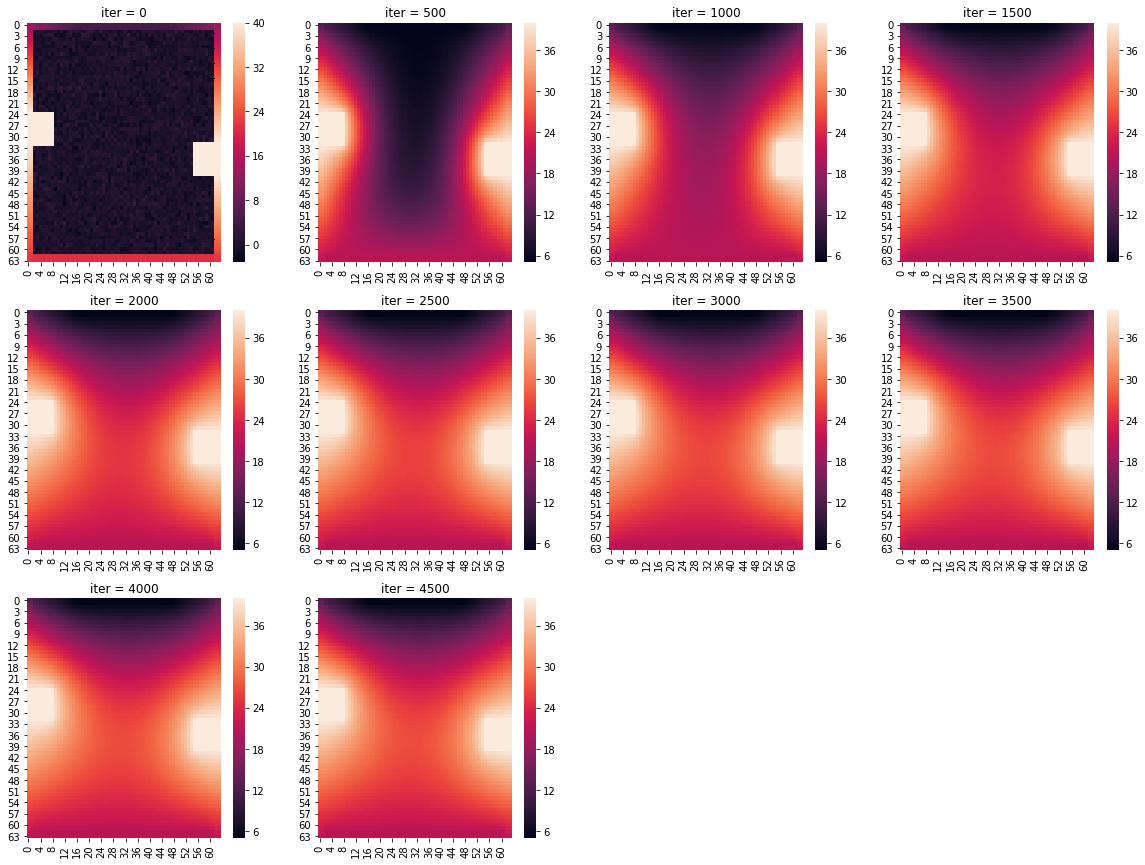

In [151]:
# Lets find the approax solution to build the RHS - (b)

def jacobi_step(T):

    m, n = T.shape

    _T = np.copy(T)

    # iterate over interior

    for i in range(2, m-1):
        for j in range(2, n-1):

            _T[i, j] = (T[i+1, j] + T[i-1, j] + T[i, j-1] + T[i, j+1]) / 4
    
    boundary(_T, n)
    
    return _T


x = initgrid(64)

plt.figure(figsize=(20, 15))

for i in range(5000):    
    if i % 500 == 0:
        plt.subplot(3, 4,i/500+1)
        sn.heatmap(x)
        plt.title('iter = %s' % i)
        
    x_true = jacobi_step(x)
    x = x_true

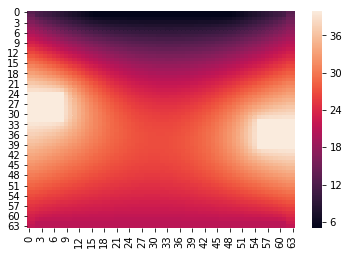

In [153]:
# Visualizing the approx solution (which will be true)
sn.heatmap(x_true)
plt.show()

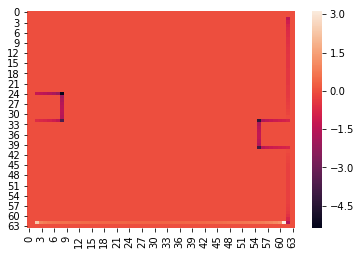

In [154]:
# Let's use the previous approx solution to build b
b = laplacian(x_true)

# Visualizing the problem
sn.heatmap(b)
plt.show()

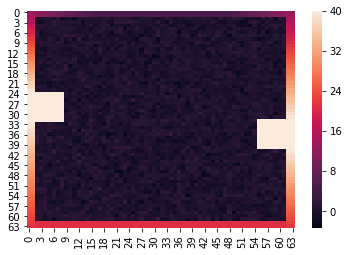

In [155]:
# Initial solution

x_0 = initgrid(64)

# Visualizing the problem
sn.heatmap(x_0)
plt.show()

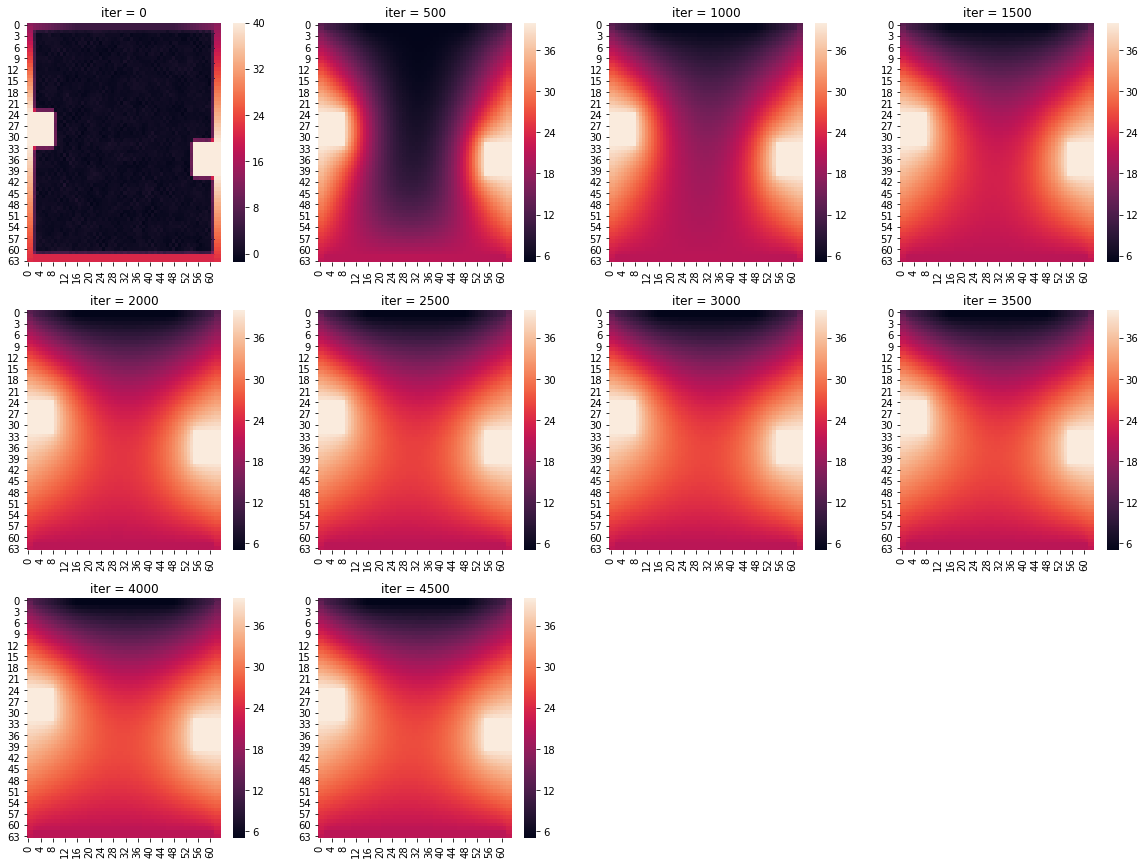

In [156]:
# Now finally we will use the above b and the initial solution x_0 to find the true solution using jacobi method to solve 
# (Ax = b)

plt.figure(figsize=(20, 15))

for i in range(5000): 
    
    x_approx = jacobi(x_0, b)
    x_0 = x_approx
    
    if i % 500 == 0:
        plt.subplot(3, 4,i/500+1)
        sn.heatmap(x_approx)
        plt.title('iter = %s' % i)

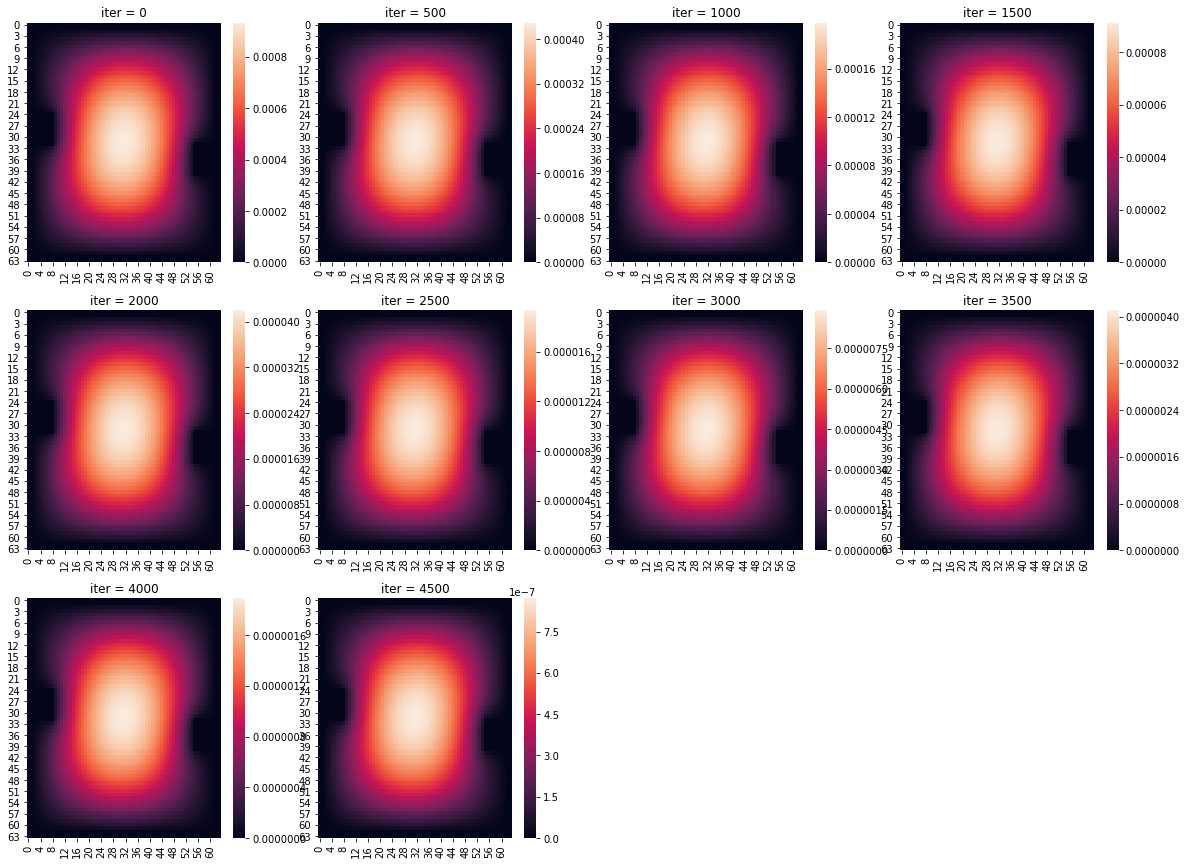

In [158]:
# solution error

plt.figure(figsize=(20, 15))

for i in range(5000): 
            
    x_approx = jacobi(x_0, b)
    
    error = x_true - x_approx
        
    if i % 500 == 0:
        plt.subplot(3, 4, i/500+1)
        sn.heatmap(error)
        plt.title('iter = %s' % i)
        
    x_0 = x_approx

# Solution error got smoother and smoother!